# Import some important libraries


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Detail

In [ ]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

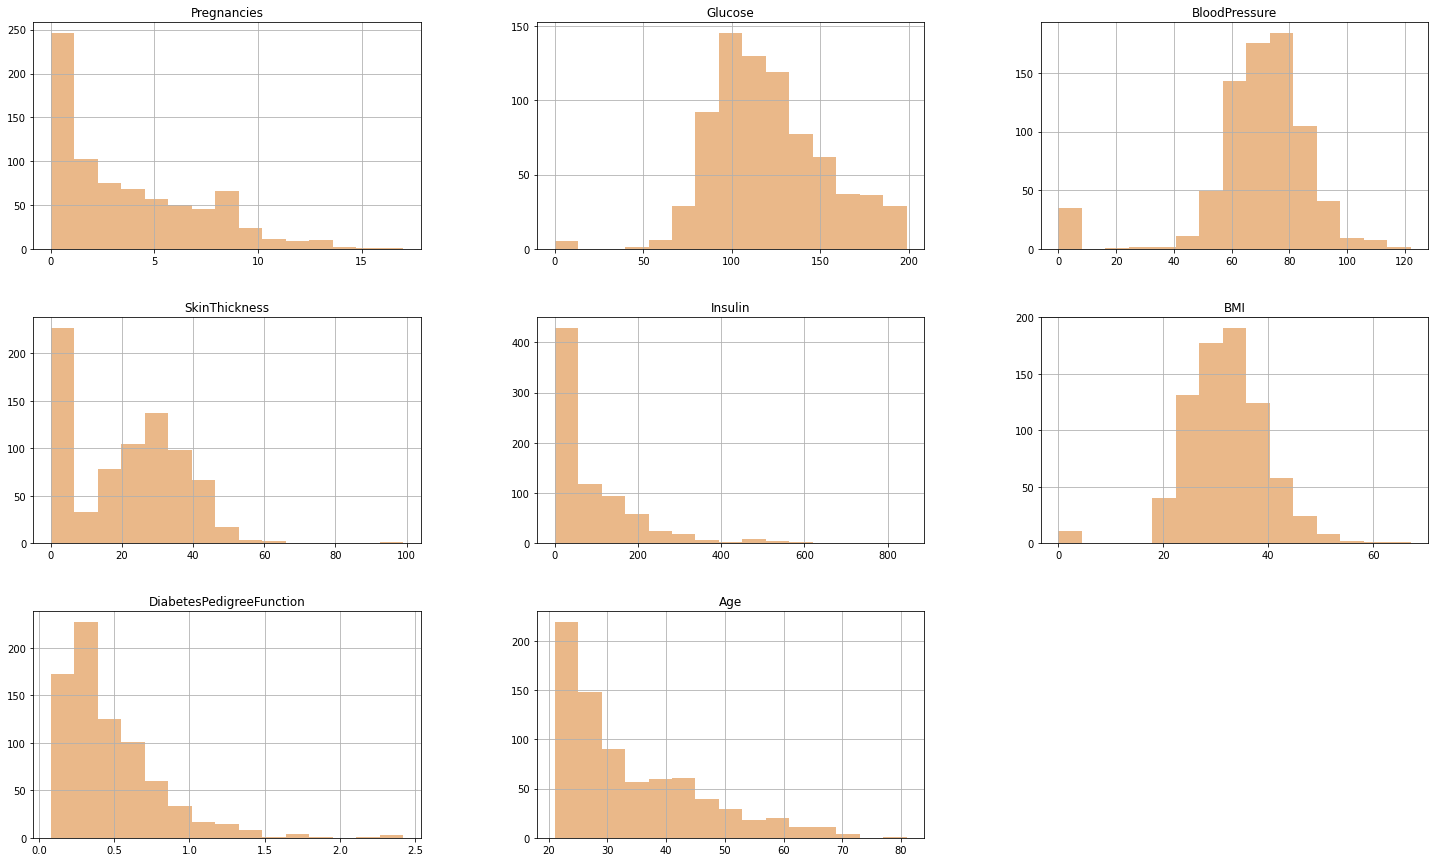

In [ ]:
color = '#eab889'
data = df.copy()
data.drop('Outcome', axis = 1, inplace = True)
data.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18
plt.show()

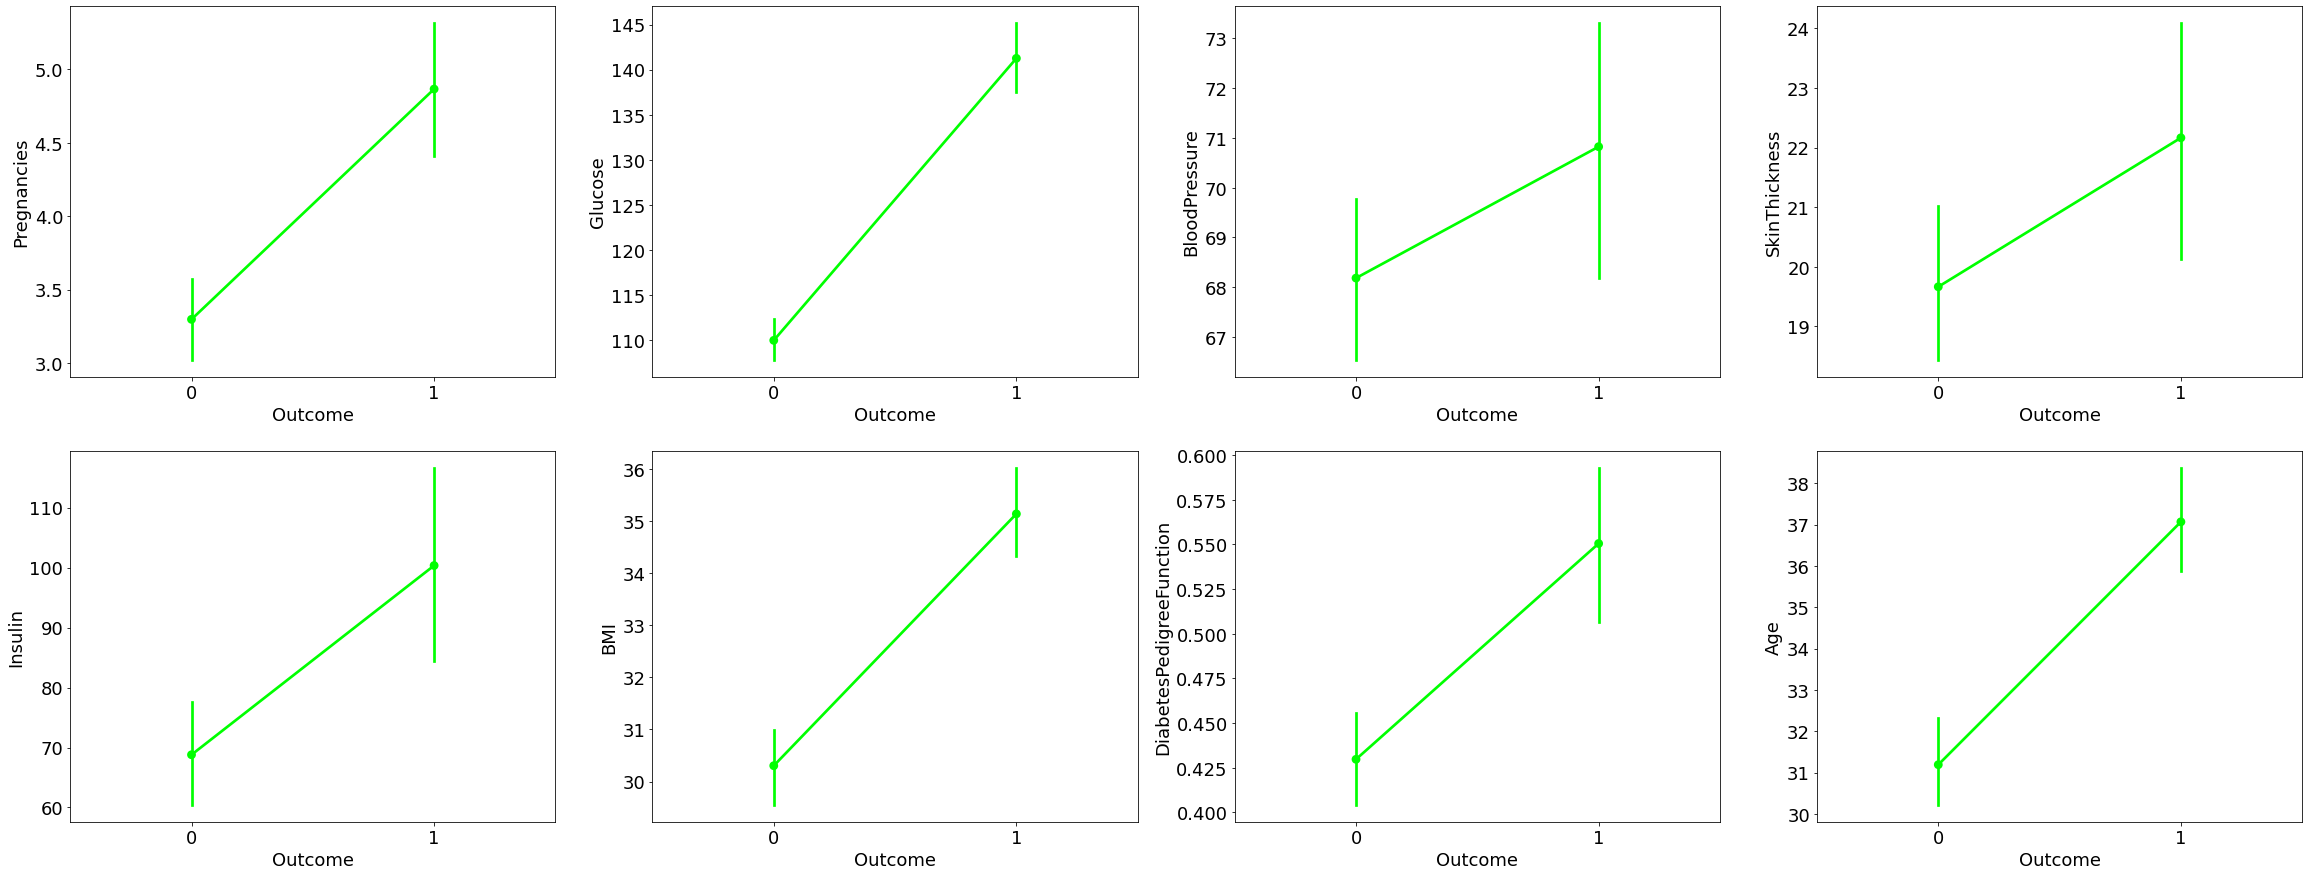

In [ ]:
fig = plt.figure(figsize=(40, 15))
rows = 2
columns = 4
for i in range(len(df.columns[:-1])):
  fig.add_subplot(rows, columns, (i+1))
  img = sns.pointplot(x='Outcome',y=df.columns[i],data=df,color='lime',alpha=0.8)
plt.show()

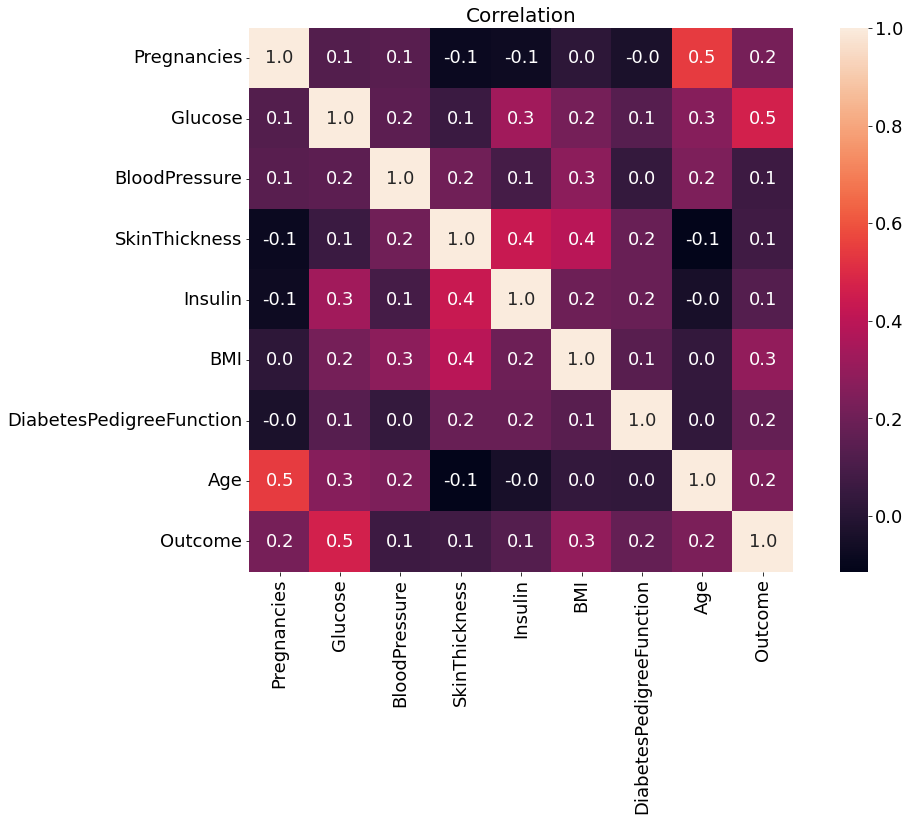

In [ ]:
plt.figure(figsize = (17,10))
sns.heatmap(df.corr(), annot=True, square=True, fmt='.1f')
plt.title('Correlation', fontsize = 20)
plt.show()

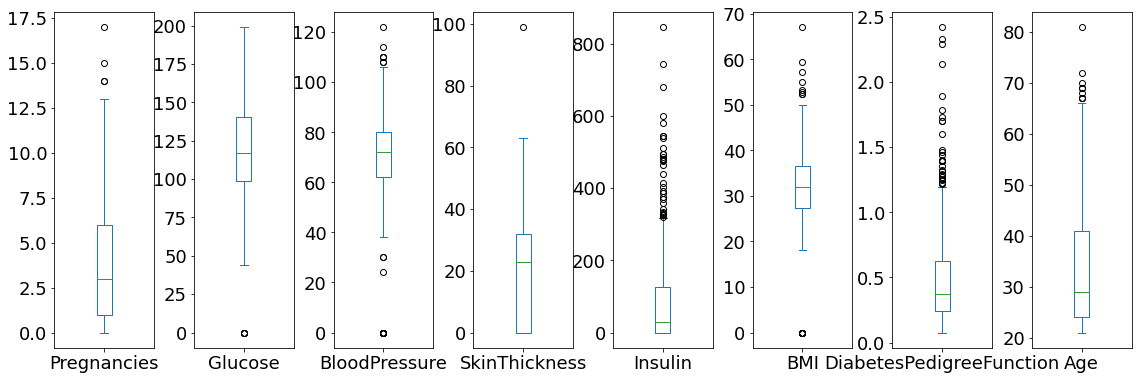

In [ ]:
data.plot(kind='box', subplots=True, layout=(2,14),figsize=(14,14), sharex=False, sharey=False)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

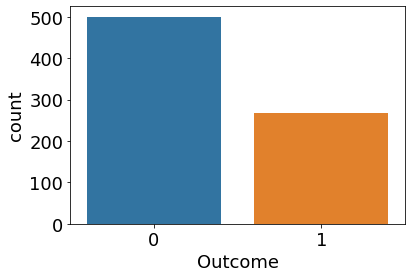

In [ ]:
sns.countplot(x="Outcome", data =df)
plt.show()

# kNN Implementation


## Train-test Split

### Data Spliting

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### Data preprocessing

In [ ]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
print(X_train_sc)

[[ 1.50755225 -1.01521454 -0.40451932 ... -1.22070104 -0.98325882
  -0.04863985]
 [-0.82986389 -0.09964691 -0.61509602 ...  0.13719053 -0.62493647
  -0.88246592]
 [-1.12204091 -0.95207195  0.54307587 ...  0.0240329   0.39884168
  -0.5489355 ]
 ...
 [ 0.04666716 -0.85735805 -0.24658679 ... -0.9440935  -0.96519215
  -1.04923114]
 [ 2.09190629 -1.14149973  0.2272108  ... -0.26514771 -0.5075031
   0.11812536]
 [ 0.33884418  0.46863645  0.64836422 ... -4.04964181  0.51627505
   2.953134  ]]


### Validation without StandardScaler

#### Training

In [ ]:
model = DecisionTreeClassifier(random_state=0, max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

#### Testing

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, log_loss
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Log loss:", log_loss(y_test, y_pred))

F1 Score: 0.625
Accuracy Score: 0.78125
Log loss: 7.555419804935945


### Validation with StandardScaler

#### Training

In [ ]:
model = DecisionTreeClassifier(random_state=0, max_depth=5)
model.fit(X_train_sc, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

#### Testing

In [ ]:
X_test_sc = scaler.fit_transform(X_test)
y_pred_sc = model.predict(X_test_sc)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, log_loss
print("F1 Score:", f1_score(y_test, y_pred_sc))
print("Accuracy Score:", accuracy_score(y_test, y_pred_sc))
print("Log loss:", log_loss(y_test, y_pred_sc))

F1 Score: 0.6379310344827587
Accuracy Score: 0.78125
Log loss: 7.555428134075844


## KFold Crossvalidation

In Kfold crossvalidation, we split the dataset into 4 subsets. Each time we pick up 1 subset/fold and use it as a testing subset. The data processing, training and testing are then performed similarly to how we do it in Train-test split.

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
k = 4
# Define K-Fold Cross Validation
kf = KFold(n_splits = k, shuffle = True, random_state = 0)


In [ ]:
# Convert dataframe to numpy
X_to_numpy = X.to_numpy()

### Validation without StandardScaler

In [ ]:
f1 = []
acc = []
ll = []

for train_index, test_index in kf.split(X_to_numpy):
  X_train, X_test = X_to_numpy[train_index], X_to_numpy[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # Train Decision Tree model
  model = DecisionTreeClassifier(random_state=0, max_depth=5)
  model.fit(X_train, y_train)
  
  # Tesing 
  y_pred = model.predict(X_test)

  # Evaluation 
  f1.append(f1_score(y_test, y_pred, average='macro'))
  acc.append(accuracy_score(y_test, y_pred))
  prediction_prob = model.predict_proba(X_test)
  ll.append(log_loss(y_test, prediction_prob))
  

print("Validation without StandardScaler")
print("Mean f1 score: ", np.mean(f1))
print("Mean accuracy score: ", np.mean(acc))
print("Mean log loss score: ", np.mean(ll))

Validation without StandardScaler
Mean f1 score:  0.6897747924752538
Mean accuracy score:  0.734375
Mean log loss score:  1.6085307262615975


### Validation with StandardScaler

In [ ]:
f1 = []
acc = []
ll = []

for train_index, test_index in kf.split(X_to_numpy):
  X_train, X_test = X_to_numpy[train_index], X_to_numpy[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # Apply StandardScaler
  scaler = StandardScaler()
  X_train_sc = scaler.fit_transform(X_train)
  X_test_sc = scaler.fit_transform(X_test)
  


  # Train Decision Tree model
  model = DecisionTreeClassifier(random_state=0, max_depth=5)
  model.fit(X_train_sc, y_train)

  # Tesing 
  y_pred_sc = model.predict(X_test_sc)

  # Evaluation 
  f1.append(f1_score(y_test, y_pred_sc, average='macro'))
  acc.append(accuracy_score(y_test, y_pred_sc))
  prediction_prob = model.predict_proba(X_test_sc)
  ll.append(log_loss(y_test, prediction_prob))
  

print("Validation without StandardScaler")
print("Mean f1 score: ", np.mean(f1))
print("Mean accuracy score: ", np.mean(acc))
print("Mean log loss score: ", np.mean(ll))

Validation without StandardScaler
Mean f1 score:  0.6977253566767084
Mean accuracy score:  0.73828125
Mean log loss score:  1.5593167931495704
